In [ ]:
!pip install sentence_transformers

In [4]:
import json
import numpy as np


In [2]:
def get_opers(tab):
	a = tab[0]
	b = []
	c = []
	if isinstance(tab[1],list):
		b = get_opers(tab[1])
	if len(tab) > 2 and isinstance(tab[2],list):
		c = get_opers(tab[2])

	ret = ([a]+b) + c
	return ret


In [3]:
f = open('test50.json')
lines = []
opers = []
for line in f.readlines():
	data = json.loads(line)
	text = " ".join(data['text'])
	spl = text.split(', ')
	lines.append(spl)

	lst = data['short_tree']
	a = get_opers(lst)
	opers.append(a)


In [6]:
d = []
d2 = []

sentences = []
for i,line in enumerate(lines):
	tmp = []
	for l in line:
		sentences.append(l)
		d2.append(i)
		tmp.append(len(sentences)-1)

	d.append(tmp)


In [7]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [10]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

sentence_embeddings = sbert_model.encode(sentences)
print(sentence_embeddings.shape)

100%|██████████| 405M/405M [00:15<00:00, 26.2MB/s]


(108, 768)


Find most similar sentences to query

In [11]:
query = "Calculate the difference between a and b"
query_vec = sbert_model.encode([query])[0]

sims=[]
for sent in sentences:
  sim = cosine(query_vec, sbert_model.encode([sent])[0])
  sims.append((sent,sim))
  # print("Sentence = ", sent, "; similarity = ", sim)

sims5 = sorted(sims, key=lambda tup: tup[1])[-10:]

for s5 in sims5:
	print(s5[0], "prob", s5[1])

given an array of numbers a and a number b  prob 0.7852883
given an array of numbers a and a number b  prob 0.7852883
compute elements in a each decremented by b prob 0.8043921
subtract b from each value of a  prob 0.8089529
decrement values in the given array by b  prob 0.82348055
subtract b from values of a  prob 0.8261806
your task is to compute values of a each decremented by b prob 0.84412575
your task is to find the difference of values of a and b prob 0.8663
decrement values in a by b  prob 0.90380675
compute the difference of elements in a and b prob 0.9558516


Show clusters

In [12]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

N_C = 15

kmeans_model = KMeans(n_clusters=N_C, init='k-means++', max_iter=100) 
X = kmeans_model.fit(sentence_embeddings)
labels=kmeans_model.labels_.tolist()
l = kmeans_model.fit_predict(sentence_embeddings)
pca = PCA(n_components=2).fit(sentence_embeddings)
datapoint = pca.transform(sentence_embeddings)

In [13]:
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

In [24]:
groups = []
for i in range(N_C):
	atest = ClusterIndicesNumpy(i, kmeans_model.labels_)
	print("\n##############################  \n","cluster number: ", i)
	print(atest)

	tmp = []

	for a in atest:
		tmp.append(d2[a])
		print(sentences[a])
	groups.append(tmp)


##############################  
 cluster number:  0
[30 36 40 42 44 46 54 59 64 68 70 72 74 76 78 89 93]
given a string a 
consider a string 
consider a string a 
you are given a string a 
you are given a string a 
you are given a string 
consider a string 
given a string 
given a string a 
consider a string a 
given a string 
you are given a string 
given a string 
consider a string a 
given a string a 
consider a string a 
you are given a string 

##############################  
 cluster number:  1
[  3   5  12  20  23  26  28  56  82  85  91  95  97  99 101 104]
you are given an array of numbers a and a number b 
consider an array of numbers a and a number b 
you are given an array of numbers a and a number b 
you are given an array of numbers and a number b 
you are given an array of numbers a and a number b 
you are given an array of numbers and a number b 
you are given an array of numbers a and a number b 
given an array of numbers a and a number b 
given an array of numbers 

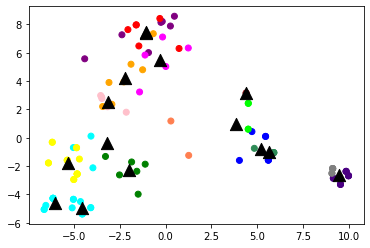

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
label1 = ['lime', 'pink', 'cyan', 'gray', 'yellow', 'red', 'blue', 'purple', 'orange','green', 'magenta','brown','seagreen','coral','indigo']
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [17]:
print(d)
print(d2)

[[0, 1, 2], [3, 4], [5, 6, 7], [8, 9], [10, 11], [12, 13], [14, 15], [16, 17], [18, 19], [20, 21, 22], [23, 24, 25], [26, 27], [28, 29], [30, 31], [32, 33], [34, 35], [36, 37], [38, 39], [40, 41], [42, 43], [44, 45], [46, 47], [48, 49], [50, 51], [52, 53], [54, 55], [56, 57, 58], [59, 60], [61, 62, 63], [64, 65], [66, 67], [68, 69], [70, 71], [72, 73], [74, 75], [76, 77], [78, 79], [80, 81], [82, 83, 84], [85, 86], [87, 88], [89, 90], [91, 92], [93, 94], [95, 96], [97, 98], [99, 100], [101, 102, 103], [104, 105], [106, 107]]
[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 26, 27, 27, 28, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 47, 48, 48, 49, 49]


In [18]:
print(groups)

[[13, 16, 18, 19, 20, 21, 25, 27, 29, 31, 32, 33, 34, 35, 36, 41, 43], [1, 2, 5, 9, 10, 11, 12, 26, 38, 39, 42, 44, 45, 46, 47, 48], [7, 14, 23, 24, 30, 37, 40], [0, 3, 7, 8, 14, 23, 24, 30, 37, 49], [4, 6, 15, 17, 22, 28, 40], [13, 18, 19, 20, 29, 35, 36], [2, 26, 28, 38, 47], [3, 4, 15, 17, 22, 49], [21, 27, 31, 32, 41, 43], [2, 9, 10, 28, 38], [39, 42, 44, 46, 48], [0, 0, 6, 8], [16, 25, 33, 34], [1, 5, 9, 10, 11, 12, 45], [26, 47]]


Attempt at giving assigning labels to groups

In [19]:
ald = list(range(0,len(opers)))

for i in range(len(groups)):
	print(i,"#####################")

	alps = groups[i]

	dct = {}
	for a in alps:
		for b in opers[a]:
			if b in dct: dct[b] +=len(opers)
			else: dct[b] = len(opers)

	df = list(set(ald) - set(alps))

	print(dict(sorted(dct.items(), key=lambda item: item[1])))

	for a in df:
		for b in opers[a]:
			if b in dct: dct[b] -=1

	print(dict(sorted(dct.items(), key=lambda item: item[1])))

	print(sentences[i],"\n")

0 #####################
{'strlen': 850}
{'strlen': 850}
consider an array of numbers and a number  

1 #####################
{'reduce': 250, 'range': 250, 'min': 250, 'lambda1': 250, 'if': 250, '>': 250, 'len': 500, 'deref': 500, 'partial1': 550, 'map': 800}
{'lambda1': 237, 'reduce': 250, 'range': 250, 'min': 250, 'if': 250, '>': 250, 'len': 500, 'deref': 500, 'partial1': 546, 'map': 796}
decrement each element in the given array by the given number  

2 #####################
{'filter': 350, 'lambda1': 350, '==': 350, '%': 350}
{'lambda1': 339, 'filter': 344, '==': 344, '%': 344}
what is the given array 

3 #####################
{'map': 100, 'partial1': 100, 'filter': 400, 'lambda1': 400, '==': 400, '%': 400}
{'map': 82, 'partial1': 87, 'lambda1': 390, 'filter': 395, '==': 395, '%': 395}
you are given an array of numbers a and a number b  

4 #####################
{'map': 100, 'partial1': 100, 'filter': 250, 'lambda1': 250, '==': 250, '%': 250}
{'map': 82, 'partial1': 87, 'lambda1': 2